# X's Community Notes Audit

Group 2: Daphne He, Anthony Lee, Stephanie Liu

### Contributions:

Daphne - Analyzing community notes data set with misleading tweet classications.

Anthony - Analyzing ratings data set of all community note ratings.

Stephanie - Analyzing note status history and user enrollment data sets.

## Introduction 

### Research Question: 
What kind of misinformation is rampant on Twitter (X) and how effective are Community Notes in combatting this? How can it be improved?
What are the key characteristics or features of community notes that correlate with high ratings of helpfulness in addressing misinformation on Twitter?

### Problem
Community Notes play an important role in combatting and addressing misinformation on Twitter (X). Despite this, there are unclear guidelines on how to write a Community Note and most notes are peer evaluated and subjective. We aim to identify key features that make Community Notes helpful to provide guidance for the contributors to follow in the future to effectively address misleading or inaccurate tweets. 

### Understanding the Notes Dataset
When a contributor submits a Community Note, they are asked to a multiple choice response form for the tweet they want to address. They have to classify it as "NOT_MISLEADING" or "MISINFORMED_OR_POTENTIALLY_MISLEADING." Tweets are also identified as either "BELIEVABLE_BY_FEW" or "BELIEVABLE_BY_MANY" if widely spread, "LITTLE_HARM" or "CONSIDERABLE_HARM", "EASY" or "CHALLENGING" to validate. 

### Classifying Misleading Tweets
Contributors can flag tweets by checking misleadingFactualError, misleadingManipulatedMedia,	misleadingOutdatedInformation,	misleadingMissingImportantContext,	misleadingUnverifiedClaimAsFact, and misleadingSatire. In the dataset, the relevant field would be labled 1 if true and 0 if false. 

### Classifying Not Misleading Tweets
Contributors can also marks tweets that aren't misleading as notMisleadingFactuallyCorrect,	notMisleadingOutdatedButNotWhenWritten,	notMisleadingClearlySatire,	notMisleadingPersonalOpinion, and trustworthySources. In the dataset, the relevant field would be labled 1 if true and 0 if false.

### Note Summary Field 
This is where we can see the Community Note written by the contributor, which is useful for future sentiment analysis, as community notes are also rated based on several parameters to determine overall helpfulness. This would be very helpful along with our ratings dataset, which evaluates the quality of community notes written by contributors to combat misinformation. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/notes.csv')
data

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote
0,1783179305159200982,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978050878,1783159712986382830,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,The House failed to pass a border protection l...,0
1,1783181538789605871,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,1783171851818021181,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,1,0,0,0,0,0,0,1,The United States has 50 States https://da...,0
2,1783182562279494134,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978827435,1783154445682979015,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,TikTok only mentions “ban” and chooses to igno...,0
3,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1,0,0,0,0,0,0,1,Forbes has a good rundown of the investigation...,0
4,1537145358521839617,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318986910,1536848327979016193,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,1,1,0,They are expressing a personal opinion in a st...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1700408720499392902,477074D5011386A0A5F941401C3DDCCCA4C5EC0A336CAF...,1694244005689,1700062242010517620,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,1,"This is Evariste Touadera, son of the presiden...",0
99996,1700460047262753234,477074D5011386A0A5F941401C3DDCCCA4C5EC0A336CAF...,1694256242945,1700168297772142760,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,1,0,0,0,1,NNN In der Antwort der Bundesregierung steht ...,0
99997,1700959715604287751,477074D5011386A0A5F941401C3DDCCCA4C5EC0A336CAF...,1694375373162,1700842285200465962,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,"This video of the July 3, 2021 landslide in At...",0
99998,1701296583311040989,477074D5011386A0A5F941401C3DDCCCA4C5EC0A336CAF...,1694455688684,1701141184037413049,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,The flash in the video (23:08:15) was a power ...,0


### Misleading vs Not Misleading
As you can see in the bar graph below, there is around four times and amount of misinformed or misleading tweets in comparison to not misleading tweets. This shows how much misinformation is rampant on Twitter, which calls for robust and effective systems in place to address them in a timely manner. 

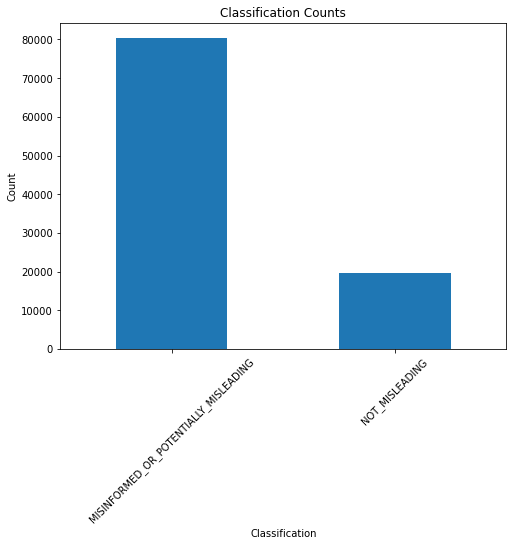

In [3]:
# Count the occurrences of each classification
classification_counts = data['classification'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Classification Counts')
plt.xticks(rotation=45)
plt.show()

### Tweet Classification
This bar graph shows the distribution of different classifications of misleading tweets. As you can see, most tweets are flagged by Community Note contributors due to missing important context, followed by factual error and unverified claim as fact. 

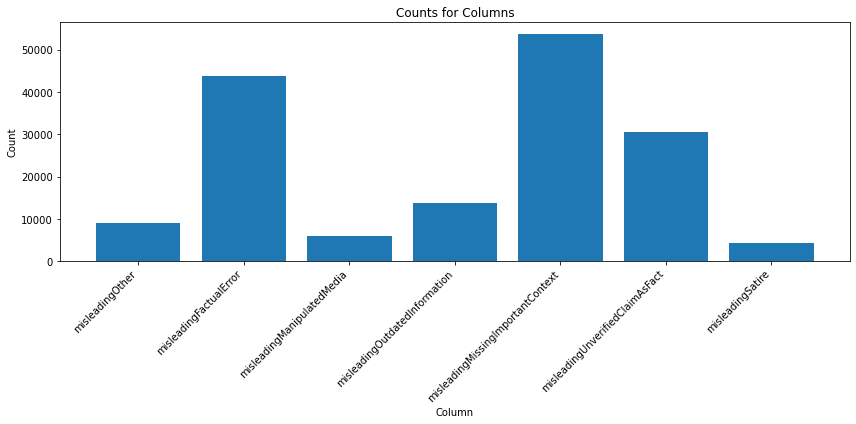

In [4]:
# Columns to plot
columns = ['misleadingOther', 'misleadingFactualError', 'misleadingManipulatedMedia',
           'misleadingOutdatedInformation', 'misleadingMissingImportantContext',
           'misleadingUnverifiedClaimAsFact', 'misleadingSatire']

# Count the occurrences of True and False values for each column
counts = data[columns].sum().reset_index()
counts.columns = ['Column', 'Count']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(counts['Column'], counts['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Counts for Columns')
plt.tight_layout()
plt.show()

### Tweet Classification
This bar graph shows the distribution of different classifications of not misleading tweets. As you can see, most tweets that aren't misleading have trustworthy sources, followed by factually correct and personoal opinion.  

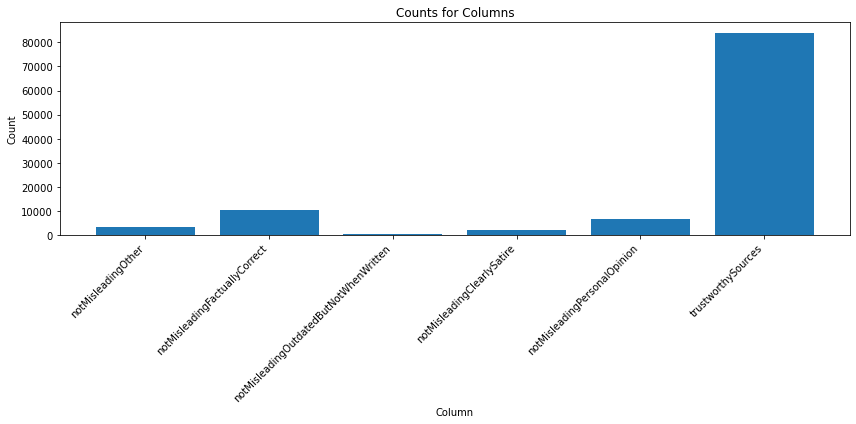

In [5]:
# Columns to plot
columns = ['notMisleadingOther','notMisleadingFactuallyCorrect', 'notMisleadingOutdatedButNotWhenWritten',
           'notMisleadingClearlySatire', 'notMisleadingPersonalOpinion', 'trustworthySources']

# Count the occurrences of True and False values for each column
counts = data[columns].sum().reset_index()
counts.columns = ['Column', 'Count']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(counts['Column'], counts['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Counts for Columns')
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

### Believable vs Harmful Tweets

**Believable:** If this tweet were widely spread, its message would likely be believed by: "BELIEVABLE_BY_FEW" or "BELIEVABLE_BY_MANY."

**Harmful:** If many believed this tweet, it might cause: "LITTLE_HARM" or "CONSIDERABLE_HARM."

After graphing different combinations, we can see an overwhelming amount of tweets that are both "BELIEVABLE_BY_MANY" and "CONSIDERABLE_HARM." This is quite concerning, which give us more insight into this extensive problem space. 

<Figure size 720x432 with 0 Axes>

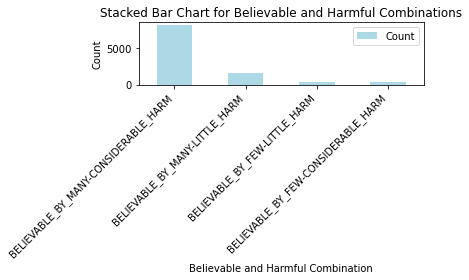

In [7]:
df_b_h = data[['believable', 'harmful']]

# Replace NaN with 'Unknown'
df_b_h = df_b_h.fillna('Unknown')  # Use fillna to replace NaN values with 'Unknown'

# Combine the 'believable' and 'harmful' columns into a single column for counting occurrences
df_b_h['Combination'] = df_b_h['believable'] + '-' + df_b_h['harmful']

# Count the occurrences
counts = df_b_h['Combination'].value_counts().reset_index()
counts.columns = ['Combination', 'Count']

# Remove the 'Unknown-Unknown' group
counts = counts[counts['Combination'] != 'Unknown-Unknown']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar', x='Combination', y='Count', stacked=True, color=['lightblue'])
plt.xlabel('Believable and Harmful Combination')
plt.ylabel('Count')
plt.title('Stacked Bar Chart for Believable and Harmful Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Believable Pie Chart
As we can see in the pie chart below, most misleading tweets that are flagged are quite disruptive, as over 94% are marked "BELIEVABLE_BY_MANY" by the contributor. 

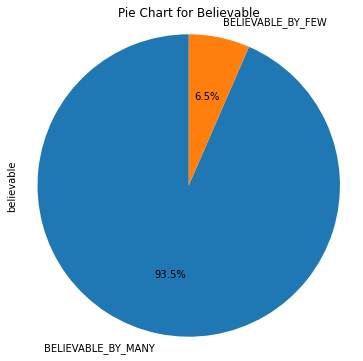

In [8]:
# Count the occurrences of 'believable' values
believable_counts = data['believable'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
ax = believable_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Believable')
plt.show()

### Harmful Pie Chart
As we can see in the pie chart below, most misleading tweets that are flagged are very harmful, as over 79% are marked "CONSIDERABLE_HARM" by the contributor. 

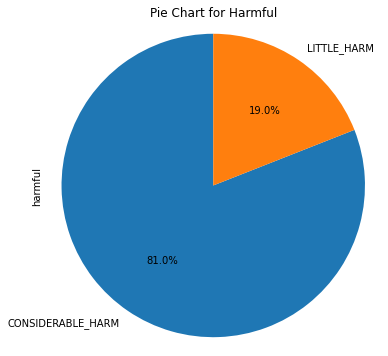

In [9]:
# Count the occurrences of 'harmful' values
harmful_counts = data['harmful'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
ax = harmful_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Harmful')
plt.show()

### Limitations:
Some fields like "believable," "harmful," and "validationDifficulty" deprecated as of 2022-10-27, so if we want to look at data past this point, we would no longer be able to access these three fields.

### Next Steps
We will combine information from all of our different datasets and analyze the factors that influence the helpfulness of a community note to identify key patterns and features to make clear guidelines for contributors to follow. We will also perfom sentiment analysis on the notes and use machine learning models test accuracy in Community Note helpfulness classification. 

### New Merged Ratings and Notes Datasets

In [11]:
notes_df = pd.read_csv('data/notes.csv')
ratings_df = pd.read_csv('data/ratings.csv')
merged_df = pd.merge(notes_df, ratings_df, on='noteId', how='inner')
helpful_df = merged_df[['noteId', 'summary', 'helpfulnessLevel', 'noteAuthorParticipantId', 'helpfulClear', 'helpfulUnbiasedLanguage','helpfulImportantContext', 'helpfulGoodSources']]
# Remove duplicate rows
helpful = helpful_df.drop_duplicates(subset=['noteId', 'summary', 'noteAuthorParticipantId'])
helpful

,noteId,summary,helpfulnessLevel,noteAuthorParticipantId,helpfulClear,helpfulUnbiasedLanguage,helpfulImportantContext,helpfulGoodSources
0,1783181538789605871,The United States has 50 States https://da...,HELPFUL,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1,1,1,1
4,1586769867381669889,"Clinton is not alone in this claim, the F.B.I....",HELPFUL,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1,1,1,1
5,1575594018691420160,This may be the first public demonstration of ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,0,0,0,0
6,1591119055103983616,Yoel Roth is no longer the head of Twitter’s ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,1,1,1,1
7,1763035751002808656,"While a Republican Senator, Cindy Hyde-Smith i...",NOT_HELPFUL,4BB4813625461AE3B657AA76389AD6F9C6A9EE05B0C183...,0,0,0,0
...,...,...,...,...,...,...,...,...
13533,1769857672114024502,shope.ee/2AqghSiwVQ Akun2 yang merusak ikl...,HELPFUL,F2C463A0653C0B8BEC74317C3EB028AE6AA3A83495F5BE...,0,0,0,0
13534,1775711591646081459,&quot;auschwitz.history&quot; is not the actua...,NOT_HELPFUL,4CB461F5149875E1A34CB5FC0C435B4E0BC9BB5CAF9348...,0,0,0,0
13535,1746787265626476833,Der AfD-Antrag wurde abgelehnt. Das beschlosse...,HELPFUL,90AB3A4A4AE4D20223527F29BFA8844EE444918B19C671...,1,1,1,1
13536,1746799072147653096,Es handelt sich im Fall der Gastronomie nicht ...,HELPFUL,90AB3A4A4AE4D20223527F29BFA8844EE444918B19C671...,1,1,1,1


In [13]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [18]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

helpful['cleaned_text'] = helpful['summary'].apply(clean_text)

# Print the cleaned text
print("Cleaned text")
print(helpful['cleaned_text'])

<ipython-input-18-2196eaec61f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpful['cleaned_text'] = helpful['summary'].apply(clean_text)


,noteId,summary,helpfulnessLevel,noteAuthorParticipantId,helpfulClear,helpfulUnbiasedLanguage,helpfulImportantContext,helpfulGoodSources,cleaned_text
0,1783181538789605871,The United States has 50 States https://da...,HELPFUL,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1,1,1,1,the united states has states httpsdatacen...
4,1586769867381669889,"Clinton is not alone in this claim, the F.B.I....",HELPFUL,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1,1,1,1,clinton is not alone in this claim the fbi has...
5,1575594018691420160,This may be the first public demonstration of ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,0,0,0,0,this may be the first public demonstration of ...
6,1591119055103983616,Yoel Roth is no longer the head of Twitter’s ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,1,1,1,1,yoel roth is no longer the head of twitters t...
7,1763035751002808656,"While a Republican Senator, Cindy Hyde-Smith i...",NOT_HELPFUL,4BB4813625461AE3B657AA76389AD6F9C6A9EE05B0C183...,0,0,0,0,while a republican senator cindy hydesmith ind...
...,...,...,...,...,...,...,...,...,...
13533,1769857672114024502,shope.ee/2AqghSiwVQ Akun2 yang merusak ikl...,HELPFUL,F2C463A0653C0B8BEC74317C3EB028AE6AA3A83495F5BE...,0,0,0,0,shopeeeaqghsiwvq akun yang merusak iklim p...
13534,1775711591646081459,&quot;auschwitz.history&quot; is not the actua...,NOT_HELPFUL,4CB461F5149875E1A34CB5FC0C435B4E0BC9BB5CAF9348...,0,0,0,0,quotauschwitzhistoryquot is not the actual acc...
13535,1746787265626476833,Der AfD-Antrag wurde abgelehnt. Das beschlosse...,HELPFUL,90AB3A4A4AE4D20223527F29BFA8844EE444918B19C671...,1,1,1,1,der afdantrag wurde abgelehnt das beschlossene...
13536,1746799072147653096,Es handelt sich im Fall der Gastronomie nicht ...,HELPFUL,90AB3A4A4AE4D20223527F29BFA8844EE444918B19C671...,1,1,1,1,es handelt sich im fall der gastronomie nicht ...


In [21]:
# pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=394606954ce80b20d9c4cdf93eed234aaf64380d142387658c83a8ece6e4d20a
  Stored in directory: /Users/daphnehe/Library/Caches/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [22]:
import re
from langdetect import detect

In [24]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

helpful['preprocessed_text'] = helpful['cleaned_text'].apply(preprocess_text)

helpful = helpful[helpful['preprocessed_text'].apply(detect_language)]

# print("Preprocessed Text:")
# print(helpful['preprocessed_text'])
helpful

<ipython-input-24-7bf66a25e317>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpful['preprocessed_text'] = helpful['cleaned_text'].apply(preprocess_text)


,noteId,summary,helpfulnessLevel,noteAuthorParticipantId,helpfulClear,helpfulUnbiasedLanguage,helpfulImportantContext,helpfulGoodSources,cleaned_text,preprocessed_text
0,1783181538789605871,The United States has 50 States https://da...,HELPFUL,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1,1,1,1,the united states has states httpsdatacen...,united state state httpsdatacensusgovallprofil...
4,1586769867381669889,"Clinton is not alone in this claim, the F.B.I....",HELPFUL,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1,1,1,1,clinton is not alone in this claim the fbi has...,clinton alone claim fbi repeatedly said extrem...
5,1575594018691420160,This may be the first public demonstration of ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,0,0,0,0,this may be the first public demonstration of ...,may first public demonstration postpublishing ...
6,1591119055103983616,Yoel Roth is no longer the head of Twitter’s ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,1,1,1,1,yoel roth is no longer the head of twitters t...,yoel roth longer head twitter trust amp safety...
7,1763035751002808656,"While a Republican Senator, Cindy Hyde-Smith i...",NOT_HELPFUL,4BB4813625461AE3B657AA76389AD6F9C6A9EE05B0C183...,0,0,0,0,while a republican senator cindy hydesmith ind...,republican senator cindy hydesmith indeed bloc...
...,...,...,...,...,...,...,...,...,...,...
13529,1685006217792389120,No it hasn't. Rees-Mogg is one of our most stu...,NOT_HELPFUL,D2FA56A4FF6C8FE55607BC4987A5FEA0131EEDC00E2BA6...,0,0,0,0,no it hasnt reesmogg is one of our most stupid...,hasnt reesmogg one stupid mp httpswwwtheneweur...
13530,1744811920148906128,"Starmer, like a lot of lawyers worked pro bono...",HELPFUL,D2FA56A4FF6C8FE55607BC4987A5FEA0131EEDC00E2BA6...,0,0,1,0,starmer like a lot of lawyers worked pro bono ...,starmer like lot lawyer worked pro bono reduce...
13531,1381801525840904192,Murder is decided by a jury; it is not decided...,NaN,F35972BBD2F99515FD974E9C7AFD899970F2E4A5911513...,0,0,0,1,murder is decided by a jury it is not decided ...,murder decided jury decided medical examiner h...
13532,1767348671341822423,Equity Florida falsely states that the settlem...,NOT_HELPFUL,F35972BBD2F99515FD974E9C7AFD899970F2E4A5911513...,0,0,0,0,equity florida falsely states that the settlem...,equity florida falsely state settlement change...


In [45]:
df_clear_helpful = helpful[helpful['helpfulClear'] == 1]
df_unbiased_helpful = helpful[helpful['helpfulUnbiasedLanguage'] == 1]
df_context_helpful = helpful[helpful['helpfulImportantContext'] == 1]
df_sources_helpful = helpful[helpful['helpfulGoodSources'] == 1]

clear_helpful = df_clear_helpful['preprocessed_text']
unbiased_helpful = df_unbiased_helpful['preprocessed_text']
context_helpful = df_context_helpful['preprocessed_text']
sources_helpful = df_sources_helpful['preprocessed_text']

In [36]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/daphnehe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
df_clear_helpful

,noteId,summary,helpfulnessLevel,noteAuthorParticipantId,helpfulClear,helpfulUnbiasedLanguage,helpfulImportantContext,helpfulGoodSources,cleaned_text,preprocessed_text
0,1783181538789605871,The United States has 50 States https://da...,HELPFUL,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1,1,1,1,the united states has states httpsdatacen...,united state state httpsdatacensusgovallprofil...
4,1586769867381669889,"Clinton is not alone in this claim, the F.B.I....",HELPFUL,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1,1,1,1,clinton is not alone in this claim the fbi has...,clinton alone claim fbi repeatedly said extrem...
6,1591119055103983616,Yoel Roth is no longer the head of Twitter’s ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,1,1,1,1,yoel roth is no longer the head of twitters t...,yoel roth longer head twitter trust amp safety...
9,1777467809221746749,This photo both not real and not from the Apri...,HELPFUL,4BB4813625461AE3B657AA76389AD6F9C6A9EE05B0C183...,1,0,1,1,this photo both not real and not from the apri...,photo real april th eclipse instead appears x ...
10,1782177611067596806,NNN - job numbers don’t rely on historical dat...,HELPFUL,4BB4813625461AE3B657AA76389AD6F9C6A9EE05B0C183...,1,1,1,0,nnn job numbers dont rely on historical data ...,nnn job number dont rely historical data job c...
...,...,...,...,...,...,...,...,...,...,...
13512,1591960708773814275,FTX and its employees contributed $41 million ...,HELPFUL,20558A8E59165A29BB77DCFD1B1E16B18D9AB26ADCDCAE...,1,1,1,1,ftx and its employees contributed million to ...,ftx employee contributed million democratic pa...
13513,1592185020592148481,Twitter explains: &quot;Tweet source labels h...,HELPFUL,20558A8E59165A29BB77DCFD1B1E16B18D9AB26ADCDCAE...,1,1,1,1,twitter explains quottweet source labels help...,twitter explains quottweet source label help b...
13518,1598049853271154688,&quot;none of our policies have changed.&quot;...,HELPFUL,20558A8E59165A29BB77DCFD1B1E16B18D9AB26ADCDCAE...,1,1,1,1,quotnone of our policies have changedquot on...,quotnone policy changedquot nov twitter ended ...
13520,1603460091579191299,Yoel Roth faced direct threats of violence fol...,HELPFUL,20558A8E59165A29BB77DCFD1B1E16B18D9AB26ADCDCAE...,1,1,1,1,yoel roth faced direct threats of violence fol...,yoel roth faced direct threat violence followi...


In [52]:
from collections import Counter
import pandas as pd
from nltk.tokenize import word_tokenize

# Concatenate all text data into a single string
all_text = ' '.join(df_clear_helpful['preprocessed_text'])

# Tokenize the string into words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Sort the words based on their frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 50 words
top_50_words = sorted_word_freq[:50]

# Convert the top 50 words to a DataFrame
df_top_50_words = pd.DataFrame(top_50_words, columns=['Word', 'Frequency'])

print(df_top_50_words)

                             Word  Frequency
0                           video        438
1                             may        355
2                         product        342
3                            note        331
4                           tweet        314
5                           claim        280
6                             nnn        272
7                            post        270
8                           state        240
9                         article        231
10                   dropshipping        230
11                            use        213
12                              u        207
13                         people        205
14                         source        199
15                           like        196
16                       evidence        188
17                           show        183
18                           year        179
19                           time        166
20                            one        163
21        

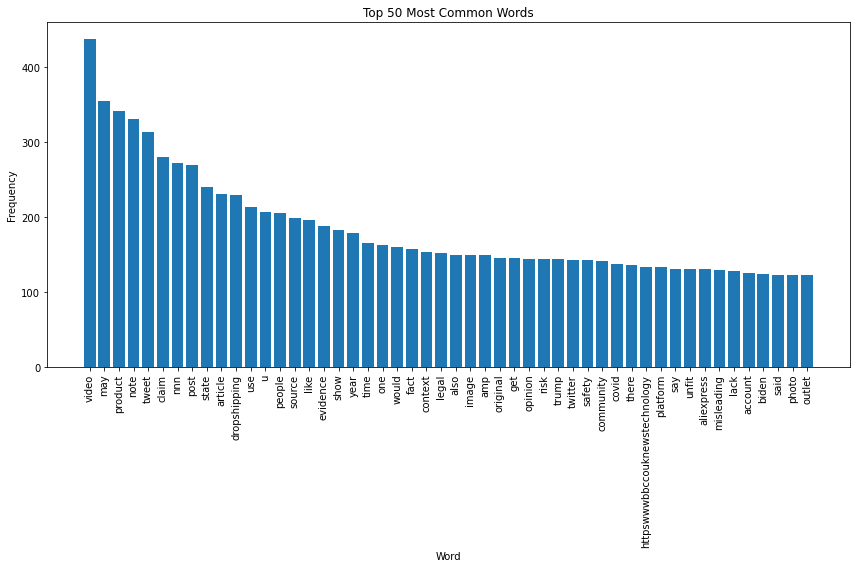

In [53]:
import matplotlib.pyplot as plt

# Plotting the top 100 words
plt.figure(figsize=(12, 8))
plt.bar(df_top_50_words['Word'], df_top_50_words['Frequency'])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [30]:
not_helpful_df = merged_df[['noteId', 'summary', 'helpfulnessLevel', 'noteAuthorParticipantId', 'notHelpfulArgumentativeOrBiased','notHelpfulOpinionSpeculation', 'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulHardToUnderstand']]
# Remove duplicate rows
unhelpful = not_helpful_df.drop_duplicates(subset=['noteId', 'summary', 'noteAuthorParticipantId'])

unhelpful['cleaned_text'] = unhelpful['summary'].apply(clean_text)

unhelpful['preprocessed_text'] = unhelpful['cleaned_text'].apply(preprocess_text)

unhelpful = unhelpful[unhelpful['preprocessed_text'].apply(detect_language)]

# Display the deduplicated DataFrame
unhelpful

<ipython-input-30-5ae1ffa9bdc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unhelpful['cleaned_text'] = unhelpful['summary'].apply(clean_text)
<ipython-input-30-5ae1ffa9bdc9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unhelpful['preprocessed_text'] = unhelpful['cleaned_text'].apply(preprocess_text)


,noteId,summary,helpfulnessLevel,noteAuthorParticipantId,notHelpfulSourcesMissingOrUnreliable,notHelpfulArgumentativeOrBiased,notHelpfulOpinionSpeculation,notHelpfulSpamHarassmentOrAbuse,notHelpfulHardToUnderstand,cleaned_text,preprocessed_text
0,1783181538789605871,The United States has 50 States https://da...,HELPFUL,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,0,0,0,0,0,the united states has states httpsdatacen...,united state state httpsdatacensusgovallprofil...
4,1586769867381669889,"Clinton is not alone in this claim, the F.B.I....",HELPFUL,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,0,0,0,0,0,clinton is not alone in this claim the fbi has...,clinton alone claim fbi repeatedly said extrem...
5,1575594018691420160,This may be the first public demonstration of ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,0,0,0,0,0,this may be the first public demonstration of ...,may first public demonstration postpublishing ...
6,1591119055103983616,Yoel Roth is no longer the head of Twitter’s ...,HELPFUL,DEB44EE644DD2F0AB97021D46CD7ABE322BF0199CDC38B...,0,0,0,0,0,yoel roth is no longer the head of twitters t...,yoel roth longer head twitter trust amp safety...
7,1763035751002808656,"While a Republican Senator, Cindy Hyde-Smith i...",NOT_HELPFUL,4BB4813625461AE3B657AA76389AD6F9C6A9EE05B0C183...,0,1,0,0,0,while a republican senator cindy hydesmith ind...,republican senator cindy hydesmith indeed bloc...
...,...,...,...,...,...,...,...,...,...,...,...
13529,1685006217792389120,No it hasn't. Rees-Mogg is one of our most stu...,NOT_HELPFUL,D2FA56A4FF6C8FE55607BC4987A5FEA0131EEDC00E2BA6...,0,1,0,0,0,no it hasnt reesmogg is one of our most stupid...,hasnt reesmogg one stupid mp httpswwwtheneweur...
13530,1744811920148906128,"Starmer, like a lot of lawyers worked pro bono...",HELPFUL,D2FA56A4FF6C8FE55607BC4987A5FEA0131EEDC00E2BA6...,0,0,0,0,0,starmer like a lot of lawyers worked pro bono ...,starmer like lot lawyer worked pro bono reduce...
13531,1381801525840904192,Murder is decided by a jury; it is not decided...,NaN,F35972BBD2F99515FD974E9C7AFD899970F2E4A5911513...,0,0,0,0,0,murder is decided by a jury it is not decided ...,murder decided jury decided medical examiner h...
13532,1767348671341822423,Equity Florida falsely states that the settlem...,NOT_HELPFUL,F35972BBD2F99515FD974E9C7AFD899970F2E4A5911513...,0,0,0,0,0,equity florida falsely states that the settlem...,equity florida falsely state settlement change...


In [54]:
df_biased_unhelpful = unhelpful[unhelpful['notHelpfulArgumentativeOrBiased'] == 1]
df_opinion_unhelpful = unhelpful[unhelpful['notHelpfulOpinionSpeculation'] == 1]
df_spam_unhelpful = unhelpful[unhelpful['notHelpfulSpamHarassmentOrAbuse'] == 1]
df_hard_unhelpful = unhelpful[unhelpful['notHelpfulHardToUnderstand'] == 1]

biased_unhelpful = df_biased_unhelpful['preprocessed_text']
opinion_unhelpful = df_opinion_unhelpful['preprocessed_text']
spam_unhelpful = df_spam_unhelpful['preprocessed_text']
hard_unhelpful = df_hard_unhelpful['preprocessed_text']

In [56]:
biased_unhelpful

7        republican senator cindy hydesmith indeed bloc...
38       trans right currently contentious obvious coll...
76       chart basically accurate reveals fact amount g...
118      twitter permanent suspension realdonaldtrump j...
133         make pay want verified blue checkmark make pay
                               ...                        
13333    california governor newsome visited southern b...
13412                                 liberal creating lie
13426    libsoftiktok post question simply show school ...
13508    tim heidecker comedian reporter satire httpsww...
13529    hasnt reesmogg one stupid mp httpswwwtheneweur...
Name: preprocessed_text, Length: 801, dtype: object

In [57]:
from collections import Counter
import pandas as pd
from nltk.tokenize import word_tokenize

# Concatenate all text data into a single string
all_text = ' '.join(df_biased_unhelpful['preprocessed_text'])

# Tokenize the string into words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Sort the words based on their frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 50 words
top_50_words = sorted_word_freq[:50]

# Convert the top 50 words to a DataFrame
df_top_50_words = pd.DataFrame(top_50_words, columns=['Word', 'Frequency'])

print(df_top_50_words)

          Word  Frequency
0         note        111
1          nnn         95
2        claim         90
3       people         83
4        tweet         72
5         post         71
6        hamas         65
7       israel         64
8      opinion         63
9    community         57
10       state         52
11       video         51
12     context         49
13         one         49
14        fact         48
15       trump         46
16         say         44
17    evidence         43
18  government         41
19     comment         41
20       child         40
21      source         40
22       would         39
23  misleading         39
24        also         39
25       woman         38
26        musk         38
27        time         38
28        make         36
29        year         36
30     twitter         35
31           u         34
32     israeli         34
33       biden         33
34        said         33
35         law         33
36         amp         32
37      need

In [67]:
from nltk import bigrams

# Tokenize the text into bigrams
text_bigrams = list(bigrams(tokens))

# Count the frequency of each bigram
bigram_freq = Counter(text_bigrams)

# Sort the bigrams based on their frequency
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 50 bigrams
top_50_bigrams = sorted_bigram_freq[:50]

# Convert the top 50 bigrams to a DataFrame
df_top_50_bigrams = pd.DataFrame(top_50_bigrams, columns=['Bigram', 'Frequency'])

print(df_top_50_bigrams)

                                               Bigram  Frequency
0                                   (community, note)          7
1                                    (proposed, note)          5
2                                 (tweet, misleading)          4
3                                   (national, guard)          4
4                                 (work, requirement)          3
5                                (community, manager)          3
6                                  (bureau, economic)          3
7                                     (infant, would)          3
8                                  (reply, community)          3
9                                      (dc, national)          3
10                                     (culture, war)          3
11                                        (make, pay)          2
12                                    (donald, trump)          2
13                                   (george, santos)          2
14                       

In [60]:
# Concatenate all text data into a single string
all_text = ' '.join(df_spam_unhelpful['preprocessed_text'])

# Tokenize the string into words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Sort the words based on their frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 50 words
top_50_words = sorted_word_freq[:50]

# Convert the top 50 words to a DataFrame
df_top_50_words = pd.DataFrame(top_50_words, columns=['Word', 'Frequency'])

print(df_top_50_words)

          Word  Frequency
0         note         19
1       israel         17
2          nnn         15
3        woman         13
4        tweet         12
5        claim         11
6      israeli         11
7        hamas         10
8      context         10
9      twitter          9
10     opinion          9
11      people          9
12   community          9
13        time          8
14        also          8
15     article          8
16       state          8
17       child          8
18       since          8
19       video          7
20   according          7
21    hospital          7
22    evidence          7
23      jewish          7
24        made          7
25       crime          7
26        make          6
27        said          6
28        year          6
29    civilian          6
30        gaza          6
31  government          6
32        stop          6
33     comment          6
34        like          6
35          cn          6
36       still          6
37  misleadi

In [65]:
# Tokenize the text into bigrams
text_bigrams = list(bigrams(tokens))

# Count the frequency of each bigram
bigram_freq = Counter(text_bigrams)

# Sort the bigrams based on their frequency
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 50 bigrams
top_50_bigrams = sorted_bigram_freq[:50]

# Convert the top 50 bigrams to a DataFrame
df_top_50_bigrams = pd.DataFrame(top_50_bigrams, columns=['Bigram', 'Frequency'])

print(df_top_50_bigrams)

                                               Bigram  Frequency
0                                   (community, note)          7
1                                    (proposed, note)          5
2                                 (tweet, misleading)          4
3                                   (national, guard)          4
4                                 (work, requirement)          3
5                                (community, manager)          3
6                                  (bureau, economic)          3
7                                     (infant, would)          3
8                                  (reply, community)          3
9                                      (dc, national)          3
10                                     (culture, war)          3
11                                        (make, pay)          2
12                                    (donald, trump)          2
13                                   (george, santos)          2
14                       

In [62]:
# Concatenate all text data into a single string
all_text = ' '.join(df_hard_unhelpful['preprocessed_text'])

# Tokenize the string into words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Sort the words based on their frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 50 words
top_50_words = sorted_word_freq[:50]

# Convert the top 50 words to a DataFrame
df_top_50_words = pd.DataFrame(top_50_words, columns=['Word', 'Frequency'])

print(df_top_50_words)

          Word  Frequency
0        tweet         20
1         note         17
2          nnn         16
3        hamas         12
4        claim         12
5        state         12
6        would         11
7        trump         10
8    community         10
9         fact         10
10      people         10
11        post         10
12        time          9
13        also          9
14     account          9
15  misleading          9
16         war          8
17         one          8
18         tax          8
19      source          8
20     twitter          7
21           u          7
22       video          7
23        show          7
24      israel          7
25     lawsuit          7
26     opinion          7
27     million          7
28        year          6
29        musk          6
30        made          6
31         may          6
32      number          6
33     nothing          6
34        free          6
35        news          6
36    evidence          6
37    propos

In [63]:
# Tokenize the text into bigrams
text_bigrams = list(bigrams(tokens))

# Count the frequency of each bigram
bigram_freq = Counter(text_bigrams)

# Sort the bigrams based on their frequency
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 50 bigrams
top_50_bigrams = sorted_bigram_freq[:50]

# Convert the top 50 bigrams to a DataFrame
df_top_50_bigrams = pd.DataFrame(top_50_bigrams, columns=['Bigram', 'Frequency'])

print(df_top_50_bigrams)

                                               Bigram  Frequency
0                                   (community, note)          7
1                                    (proposed, note)          5
2                                 (tweet, misleading)          4
3                                   (national, guard)          4
4                                 (work, requirement)          3
5                                (community, manager)          3
6                                  (bureau, economic)          3
7                                     (infant, would)          3
8                                  (reply, community)          3
9                                      (dc, national)          3
10                                     (culture, war)          3
11                                        (make, pay)          2
12                                    (donald, trump)          2
13                                   (george, santos)          2
14                       

In [68]:
from nltk import trigrams

# Tokenize the text into trigrams
text_trigrams = list(trigrams(tokens))

# Count the frequency of each trigram
trigram_freq = Counter(text_trigrams)

# Sort the trigrams based on their frequency
sorted_trigram_freq = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 50 trigrams
top_50_trigrams = sorted_trigram_freq[:100]

# Convert the top 50 trigrams to a DataFrame
df_top_50_trigrams = pd.DataFrame(top_50_trigrams, columns=['Trigram', 'Frequency'])

print(df_top_50_trigrams)

                                              Trigram  Frequency
0                            (reply, community, note)          3
1                               (dc, national, guard)          3
2                               (u, bureau, economic)          2
3                        (bureau, economic, analysis)          2
4                            (community, note, tweet)          2
..                                                ...        ...
95  (either, httpswwwamnestyorgenwhatwedorefugeesa...          1
96  (httpswwwamnestyorgenwhatwedorefugeesasylumsee...          1
97                            (twitter, isnt, losing)          1
98                               (isnt, losing, mday)          1
99                             (losing, mday, figure)          1

[100 rows x 2 columns]


In [71]:
# nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/daphnehe/nltk_data...


True

In [72]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each text in the DataFrame
df_unbiased_helpful['sentiment_scores'] = df_unbiased_helpful['preprocessed_text'].apply(lambda x: sid.polarity_scores(x))

# Extract compound sentiment scores (a score between -1 and 1 representing overall sentiment)
df_unbiased_helpful['compound_sentiment'] = df_unbiased_helpful['sentiment_scores'].apply(lambda x: x['compound'])

# Classify sentiment as positive, negative, or neutral based on compound score
df_unbiased_helpful['sentiment'] = df_unbiased_helpful['compound_sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the DataFrame with sentiment analysis results
print(df_unbiased_helpful[['preprocessed_text', 'sentiment']])

                                       preprocessed_text sentiment
0      united state state httpsdatacensusgovallprofil...  positive
4      clinton alone claim fbi repeatedly said extrem...  negative
6      yoel roth longer head twitter trust amp safety...  positive
10     nnn job number dont rely historical data job c...  positive
11     median sale price new house u peaked october n...   neutral
...                                                  ...       ...
13512  ftx employee contributed million democratic pa...  negative
13513  twitter explains quottweet source label help b...  positive
13518  quotnone policy changedquot nov twitter ended ...  positive
13520  yoel roth faced direct threat violence followi...  negative
13522  none wapos drew harwall nyts ryan mac cnns don...  negative

[2411 rows x 2 columns]


<ipython-input-72-c332fdbc383a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unbiased_helpful['sentiment_scores'] = df_unbiased_helpful['preprocessed_text'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-72-c332fdbc383a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unbiased_helpful['compound_sentiment'] = df_unbiased_helpful['sentiment_scores'].apply(lambda x: x['compound'])
<ipython-input-72-c332fdbc383a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

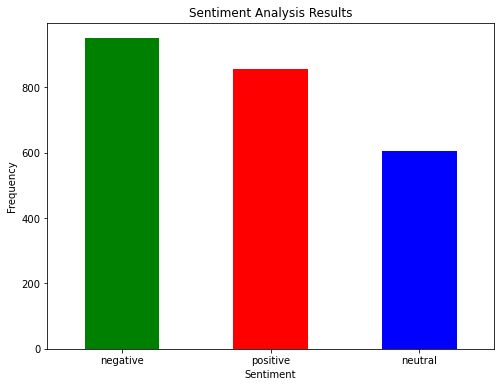

In [73]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df_unbiased_helpful['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()